In [1]:
from action_count_info import create_count_information
from subsample_vault import subsample_smaller_vault
from plot_oaco import plot_oaco, plot_count_frequencies, plot_reward_variability
# from offline_dataset import analyse_vault
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Processing coverage information for a multi-agent dataset

In [2]:
# set to False to reduce storage requirements
random_dataset_uid_pos = -2

In [3]:
rel_dir = "vaults/smac_v1/"

vault_name = "5m_vs_6m"
# vault_uids=["Expert","Medium","Medium-Replay","Mixed"]
# vault_uids=["Replay","Random"]
# vault_uids=["Good","Medium","Poor"]
vault_uids=["Good","Medium","Poor","omiga_Good","omiga_Medium","omiga_Poor","cfcql_Expert","cfcql_Medium","cfcql_Medium-Replay","cfcql_Mixed"]

new_vault_name = vault_name+'_20000.vlt'

for vault_uid in vault_uids:

    # make a smaller vault - it is easier for memory to handle
    new_vault_name = subsample_smaller_vault(rel_dir,vault_name,vault_uid,20000)

    # for each new vault, store count information at the new vault location
    keys = create_count_information(rel_dir, new_vault_name, vault_uid)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m.vlt/Good
996726
New vault created at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m_20000.vlt/Good
Since the provided buffer state has a temporal dimension of 20000, you must write to the vault at least every 19999 timesteps to avoid data loss.
19972
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m_20000.vlt/Good
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m.vlt/Medium
996855
New vault created at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m_20000.vlt/Medium
Since the provided buffer state has a temporal dimension of 20000, you must write to the vault at least every 19999 timesteps to avoid data loss.
19998
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m_20000.v

KeyboardInterrupt: 

Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m.vlt/omiga_Poor
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m.vlt/omiga_Medium
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m.vlt/omiga_Good
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m.vlt/cfcql_Mixed
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m.vlt/cfcql_Medium-Replay
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m.vlt/cfcql_Medium
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m.vlt/cfcql_Expert
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m.vlt/Poor
Loading vault found at /home/louise/workspace/og-marl/

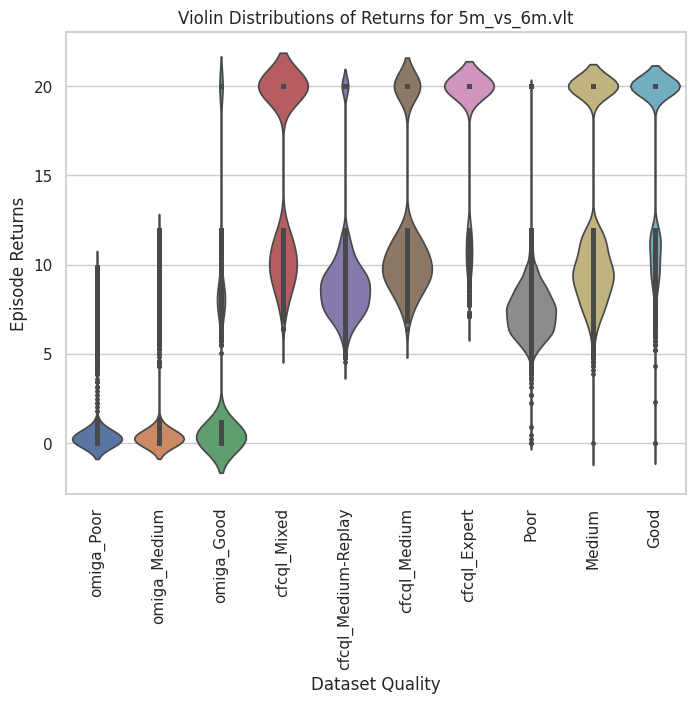

Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m_20000.vlt/Medium
Loading vault found at /home/louise/workspace/og-marl/development/clean_utils/vaults/smac_v1/5m_vs_6m_20000.vlt/Good


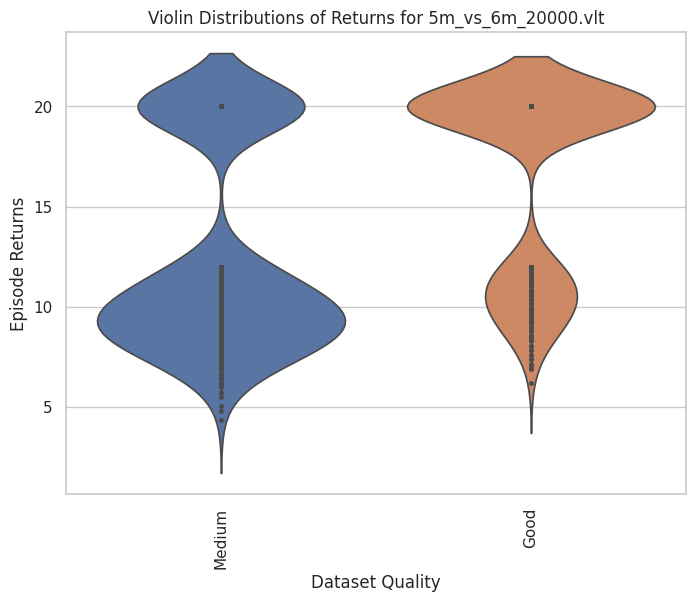

In [4]:
vltt = vault_name+'.vlt'
returns = analyse_vault(vltt,vault_uids,rel_dir,visualise=True)
returns = analyse_vault(new_vault_name,vault_uids,rel_dir,visualise=True,save=True)

In [5]:
import pandas as pd
import seaborn as sns


def plot_oaco(rel_dir,vault_name,vault_uids,random_dataset_pos=-2,norm_wrt_state=False):
    num_unique = {}
    for uid in vault_uids:
        with open(rel_dir+"/"+vault_name+"/"+uid+"/number_unique.pickle","rb") as f:
            num_unique[uid] = pickle.load(f)

    unique_df = pd.DataFrame(num_unique)
    unique_df.transpose

    fig, ax = plt.subplots(1,1,figsize=(13,4))

    # normalise wrt random if random dataset exists
    if random_dataset_pos!=-2:
        unique_df = unique_df.div(unique_df.iloc[:,random_dataset_pos],axis=0)

    # normalise wrt random if random dataset exists
    if norm_wrt_state:
        unique_df = unique_df.div(unique_df.iloc[-1,:],axis=1)

    sns.heatmap(unique_df,annot=True,fmt='.0f',square=False)
    # plt.title(vault_name)
    plt.xticks(rotation=30, ha='right')
    plt.savefig(rel_dir+"/"+vault_name+"/"+"OACo_heatmap.pdf",format='pdf',bbox_inches='tight')
    plt.show()
    return

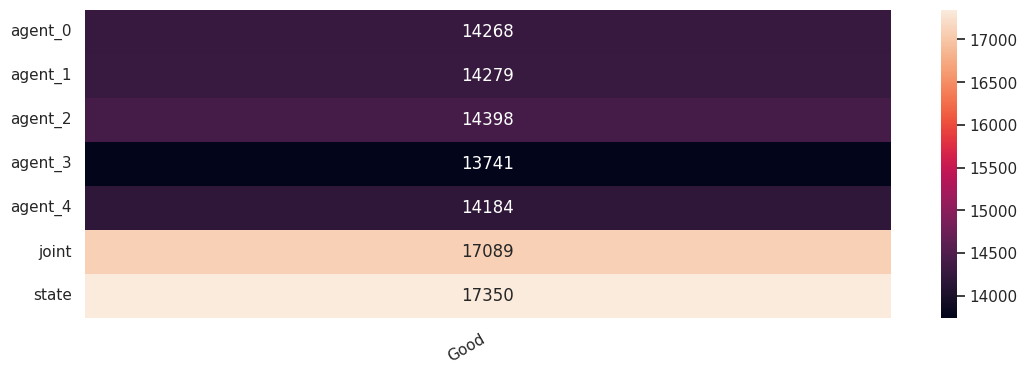

In [10]:
plot_oaco(rel_dir,new_vault_name,["Good"],random_dataset_uid_pos,False)

In [11]:
def plot_top_five(rel_dir,vault_name,vault_uids): 

    colors = {
            'death':'black',
            'misc repeated':'orange',
            'non-repeated':'yellow',
            '0':'green',
            '1':'blue',
            '2':'turquoise',
            '3':'red',
            '4':'purple',
            }
    num_unique = {}
    top_5_vals = {}
    top_5_counts = {}

    for uid in vault_uids:
        sizes = {}
        labels = {}

        with open(rel_dir+"/"+vault_name+"/"+uid+"/number_unique.pickle","rb") as f:
            num_unique[uid] = pickle.load(f)

        with open(rel_dir+"/"+vault_name+"/"+uid+"/top_five.pickle","rb") as f:
           (top_5_vals[uid], top_5_counts[uid]) = pickle.load(f)

        labels_dict = {}
        sizes_dict = {}
        for key in list(num_unique[uid].keys()):
            sizes = []
            labels = []

            sizes.append(num_unique[uid][key])
            labels.append('non-repeated')

            death_state = -2
            for i,val in enumerate(top_5_vals[uid][key]):
                # print(val)
                if not val.astype(bool).any():
                    death_state = i

                    sizes.append(top_5_counts[uid][key][i])
                    labels.append("death")
                else:
                    sizes.append(top_5_counts[uid][key][i])
                    # labels.append(top_5_vals[uid][key][i])
                    labels.append(str(i))
            # print(tt(key)
            # prinop_5_vals[uid][key])
            

            # todo get exact numberprint(sum(sizes[key]))
            sizes.append(25000-sum(sizes))
            labels.append("misc repeated")

            labels_dict[key] = labels
            sizes_dict[key] = sizes

            sizes_offset = np.cumsum(sizes)-sizes

            # plt.pie(sizes, labels=labels)
            # plt.title(str(key)+str(uid))
            # plt.show()
            for i in range(len(sizes)):
                plt.bar([key],sizes[i], 0.4, bottom=sizes_offset[i],color=colors[labels[i]])
    
        plt.title(uid)
        plt.show()
    
    return

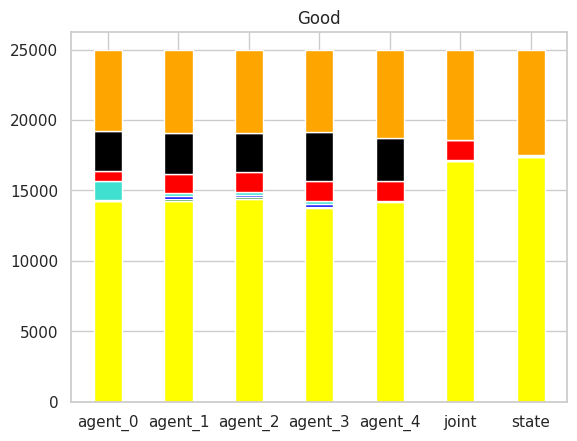

In [12]:
plot_top_five(rel_dir,new_vault_name,['Good'])

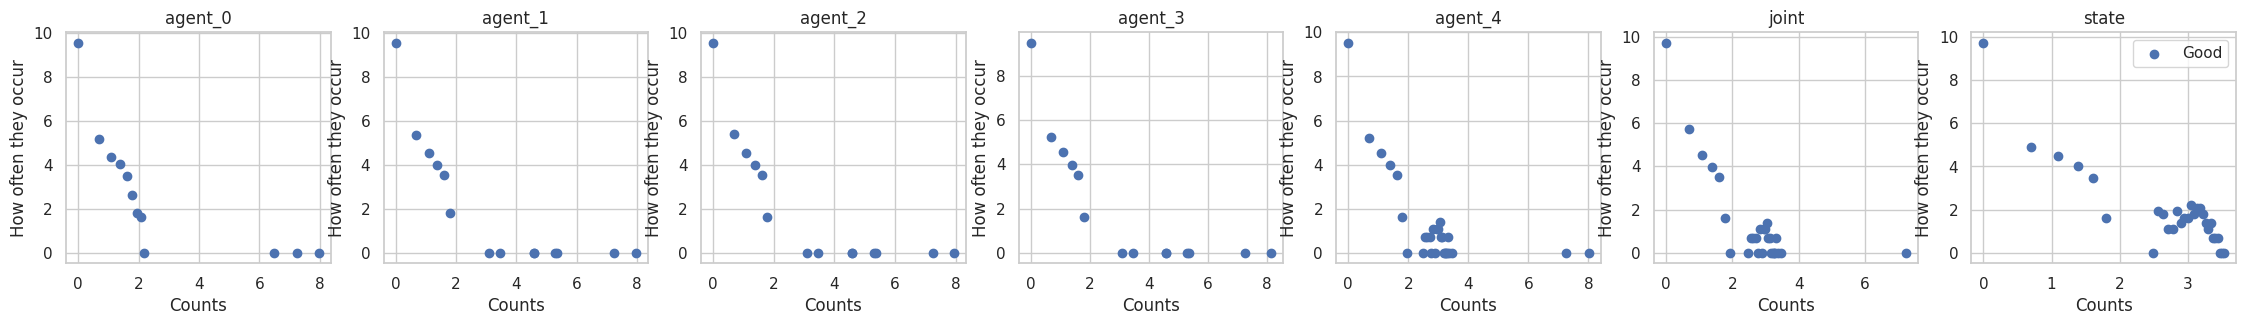

TypeError: 'Axes' object is not subscriptable

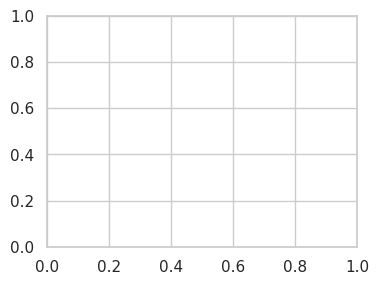

In [14]:
plot_count_frequencies(rel_dir,new_vault_name,['Good'])

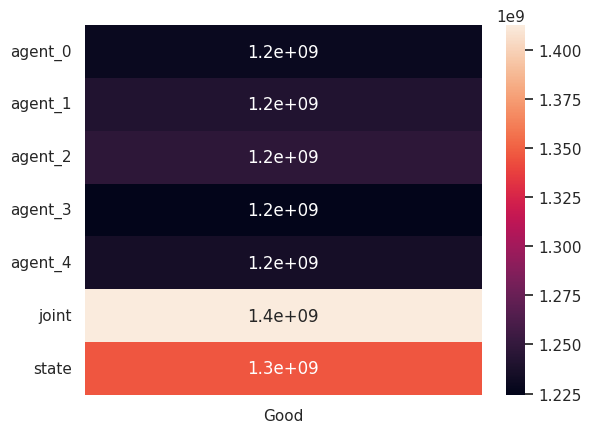

In [15]:
plot_reward_variability(rel_dir,new_vault_name,['Good'])

In [11]:
def plot_reward_repeat_correlation(rel_dir,vault_name,vault_uids):
    num_unique = {}
    probs = {}
    for uid in vault_uids:
        with open(rel_dir+"/"+vault_name+"/"+uid+"/number_unique.pickle","rb") as f:
            num_unique[uid] = pickle.load(f)

        with open(rel_dir+"/"+vault_name+"/"+uid+"/processed_reward_info.pickle","rb") as f:
            (probs[uid], _) = pickle.load(f)

        plt.scatter(num_unique[uid].values(),probs[uid].values(),label=str(uid))
        plt.scatter(num_unique[uid]['state'],probs[uid]['state'],marker='o',facecolors='none',edgecolors='black')

        # maybe times rewards by any 2 -> prob of getting contradicting data

    plt.legend(bbox_to_anchor=(1,1))
    plt.show()
    return

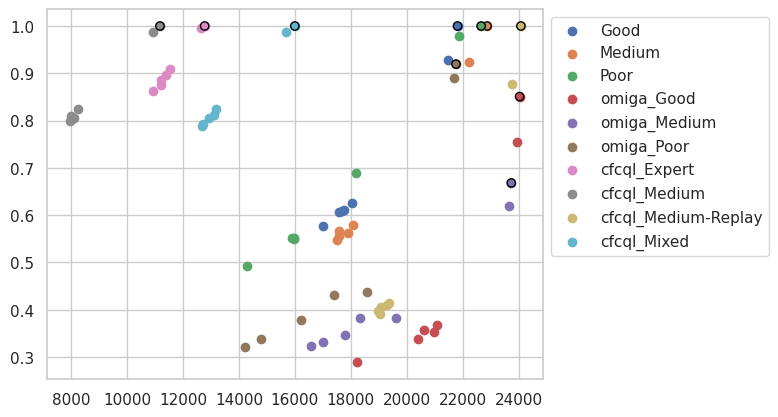

In [12]:
plot_reward_repeat_correlation(rel_dir,new_vault_name,vault_uids)

In [16]:
rel_dir = rel_dir
uid = 'Good'
with open(rel_dir+"/"+new_vault_name+"/"+uid+"/number_unique.pickle","rb") as f:
    num_unique = pickle.load(f)

with open(rel_dir+"/"+new_vault_name+"/"+uid+"/processed_reward_info.pickle","rb") as f:
    (probs, _) = pickle.load(f)

In [17]:
print(probs)

{'agent_0': 1229199612.0310328, 'agent_1': 1240809103.8298845, 'agent_2': 1247062170.49212, 'agent_3': 1224364772.0403528, 'agent_4': 1234924532.0072646, 'joint': 1412702844.1206229, 'state': 1345969803.8338256}
